### 二维旋转矩阵的复合

旋转角为  $ \theta $  的矩阵记为  
\begin{aligned}
R(\theta)
&=
\begin{pmatrix}
\cos\theta & -\sin\theta \\[4pt]
\sin\theta & \cos\theta
\end{pmatrix}
\end{aligned}

先转  $ \beta $  再转  $ \alpha $  等价于直接转  $ \alpha+\beta $：


\begin{aligned}
R(\alpha)\,R(\beta)
&=
\begin{pmatrix}
\cos\alpha & -\sin\alpha \\[4pt]
\sin\alpha & \cos\alpha
\end{pmatrix}
\begin{pmatrix}
\cos\beta & -\sin\beta \\[4pt]
\sin\beta & \cos\beta
\end{pmatrix} \\[6pt]
&=
\begin{pmatrix}
\cos\alpha\cos\beta-\sin\alpha\sin\beta &
-\cos\alpha\sin\beta-\sin\alpha\cos\beta \\[4pt]
\sin\alpha\cos\beta+\cos\alpha\sin\beta &
-\sin\alpha\sin\beta+\cos\alpha\cos\beta
\end{pmatrix} \\[6pt]
&=
\begin{pmatrix}
\cos(\alpha+\beta) & -\sin(\alpha+\beta) \\[4pt]
\sin(\alpha+\beta) & \cos(\alpha+\beta)
\end{pmatrix} \\[6pt]
&= R(\alpha+\beta).
\end{aligned}


**结论**：连续两次二维旋转等于一次转角相加的旋转。

- $ ||R(\theta)||=1 $，行列式为1
- 乘以一个向量
    - 不改变其长度
    - 只改变其角度（只进行旋转）
    - 为逆时针旋转
        - 旋转角度$\theta$为其与$x$轴正方向的夹角

基本性质  
  - 行列式  
    $
    \det R(\theta)=\cos^2\theta+\sin^2\theta=1
    $  
    因此 **R(θ) 是体积保持的线性变换**。  
  - 对任意向量 **v**∈ℝ²，  
    $
    \|R(\theta)\mathbf v\|=\|\mathbf v\|,
    $  
    即**不改变长度，只改变方向**。  
  - 旋转方向：θ>0 时**逆时针**旋转；θ<0 时顺时针。


一个具体例子：θ=90°<br/><br/>$R\!\bigl(\tfrac\pi2\bigr)=
\begin{pmatrix}
0 & -1 \\[2pt]
1 & 0
\end{pmatrix}$把标准基向量 **e₁**=[1,0]ᵀ 映到 **e₂**=[0,1]ᵀ：$R\!\bigl(\tfrac\pi2\bigr)\mathbf e_1=
\begin{pmatrix}0\\1\end{pmatrix}=\mathbf e_2.$
<br/><br/>这正是“逆时针转 90°”的几何事实。

对任意非零向量 **a**, **b**，它们的夹角 θ 满足$
\cos\theta=\frac{\mathbf a\cdot\mathbf b}{\|\mathbf a\|\,\|\mathbf b\|}
$<br/>旋转矩阵 R(θ) 就是当 ‖a‖=‖b‖ 时把 **a** 转到 **b** 的“最短旋转”算子

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rot_matrix(theta):
    return np.asarray([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

In [4]:
x = np.asarray([1,0])

In [5]:
# 逆时针30°旋转算子
R1 = rot_matrix(np.pi/6)

In [6]:
R1

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [7]:
x_prime = R1.dot(x)
x_prime

array([0.8660254, 0.5      ])

(-0.5, 1.5)

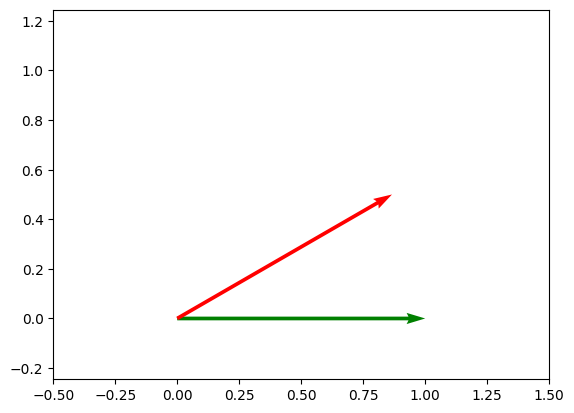

In [8]:
plt.quiver([0, 0], [0, 0], [x[0], x_prime[0]], [x[1], x_prime[1]], 
           angles="xy", scale_units="xy", scale=1, color=['g', 'r'])
plt.axis('equal')
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)

In [9]:
# 长度
np.linalg.norm(x_prime)

1.0

In [10]:
# 角度
x.dot(x_prime) / (np.linalg.norm(x)*np.linalg.norm(x_prime))

0.8660254037844387

In [11]:
np.cos(np.pi/6)

0.8660254037844387

旋转矩阵连乘

In [12]:
R2 = rot_matrix(np.pi/6)

In [13]:
x_prime2 = R2.dot(R1).dot(x)
x_prime2

array([0.5      , 0.8660254])

In [14]:
np.linalg.norm(x_prime2)

1.0

In [15]:
# 角度
x_prime2.dot(x) / (np.linalg.norm(x_prime2) * np.linalg.norm(x))

0.5000000000000001

In [16]:
np.cos(np.pi/3)

0.5000000000000001

(-0.5, 1.5)

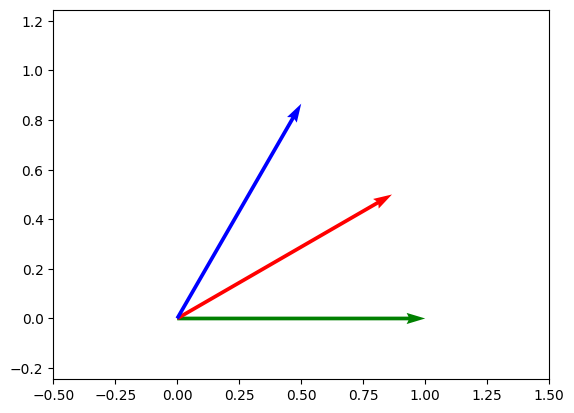

In [17]:
plt.quiver([0, 0, 0], [0, 0, 0], 
           [x[0], x_prime[0], x_prime2[0]], 
           [x[1], x_prime[1], x_prime2[1]], 
           angles="xy", scale_units="xy", scale=1, color=['g', 'r', 'b'])
plt.axis('equal')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

复平面
- $z=a+ib$
    - $r=1,a=cos \theta,b=sin \theta $
    - $z=cos \theta + i*sin\theta$



**“旋转一个向量”** 与 **“乘一个模为 1 的复数”** 是同一件事，只是两种语言。

---

### 1 复数视角的旋转
在复平面里把任意向量  $z=x+iy$  看成从原点出发的复数。
乘以一个**单位复数**  $$e^{i\theta}=\cos\theta+i\sin\theta$$ （模长为 1，幅角为 θ）就得到新复数  
$$z' = e^{i\theta}\,z = (\cos\theta+i\sin\theta)(x+iy)$$

按复数乘法展开  
$$z' = (\cos\theta\cdot x - \sin\theta\cdot y) + i(\sin\theta\cdot x + \cos\theta\cdot y)$$

### 2 矩阵视角的旋转
同一操作写成矩阵乘法：  
$$
\begin{align*}
\begin{pmatrix} x' \\ y' \end{pmatrix}
&= \underbrace{\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}}_{R(\theta)}
\begin{pmatrix} x \\ y \end{pmatrix} \\[6pt]
&= \begin{pmatrix}
\cos\theta\cdot x - \sin\theta\cdot y \\
\sin\theta\cdot x + \cos\theta\cdot y
\end{pmatrix}
\end{align*}
$$

### 3. 因此  
> 乘以单位复数 $e^{i\theta}$ ≡ 左乘旋转矩阵 $R(\theta)$
它们都是“**逆时针转 θ 角度而长度不变**”的同义表述。

In [18]:
x

array([1, 0])

In [23]:
# 构造单位复数
rot = np.cos(np.pi/6) + 1j*np.sin(np.pi/6)
# 乘单位矩阵
z = rot * (x[0]+1j*x[1])
# 取结果的实部
print(np.real(z))
# 取结果的虚部
print(np.imag(z))

0.8660254037844387
0.49999999999999994


In [24]:
# 旋转30度，两次
rot = rot*rot
print(np.real(rot * (x[0]+1j*x[1])))
print(np.imag(rot * (x[0]+1j*x[1])))

0.5000000000000002
0.8660254037844386
